# **Agil Irman Fadri**

# **12250314181**

# **Nur Futri Ayu Jelita**

# **12250320374**

In [54]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk Lenovo
kode_saham = "INDF.JK"

# Tentukan rentang waktu
start_date = "2018-01-01"
end_date = "2025-01-01"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INDF.JK,INDF.JK,INDF.JK,INDF.JK,INDF.JK
Date,,,,,
2018-01-01,5782.837891,5782.837891,5782.837891,5782.837891,0
2018-01-02,5725.958984,5839.719759,5725.958984,5801.799501,6875700
2018-01-03,5801.798828,5839.719082,5763.878574,5763.878574,11532300
2018-01-04,5858.678711,5858.678711,5763.878085,5801.798335,6861700
2018-01-05,5820.758789,5839.718915,5782.838536,5839.718915,8060200


In [55]:
df.to_excel('INDF.xlsx')

In [56]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/nvda.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2018-01-01,5782.837891,5782.837891,5782.837891,5782.837891,0
1,2018-01-02,5725.958984,5839.719759,5725.958984,5801.799501,6875700
2,2018-01-03,5801.798828,5839.719082,5763.878574,5763.878574,11532300
3,2018-01-04,5858.678711,5858.678711,5763.878085,5801.798335,6861700
4,2018-01-05,5820.758789,5839.718915,5782.838536,5839.718915,8060200


In [57]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1725,2024-12-20,7625.0
1726,2024-12-23,7725.0
1727,2024-12-24,7625.0
1728,2024-12-27,7700.0
1729,2024-12-30,7700.0


In [ ]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [58]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1730 non-null   datetime64[ns]
 1   Close   1730 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.2 KB


In [59]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [60]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1730,1730.000000
mean,2021-06-10 02:18:10.404624128,5866.460014
min,2018-01-01 00:00:00,4108.421875
25%,2019-08-28 06:00:00,5438.618408
50%,2021-06-08 12:00:00,5843.821777
75%,2023-03-02 18:00:00,6195.867065
max,2024-12-30 00:00:00,8200.000000
std,NaN,627.988840


In [61]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Input

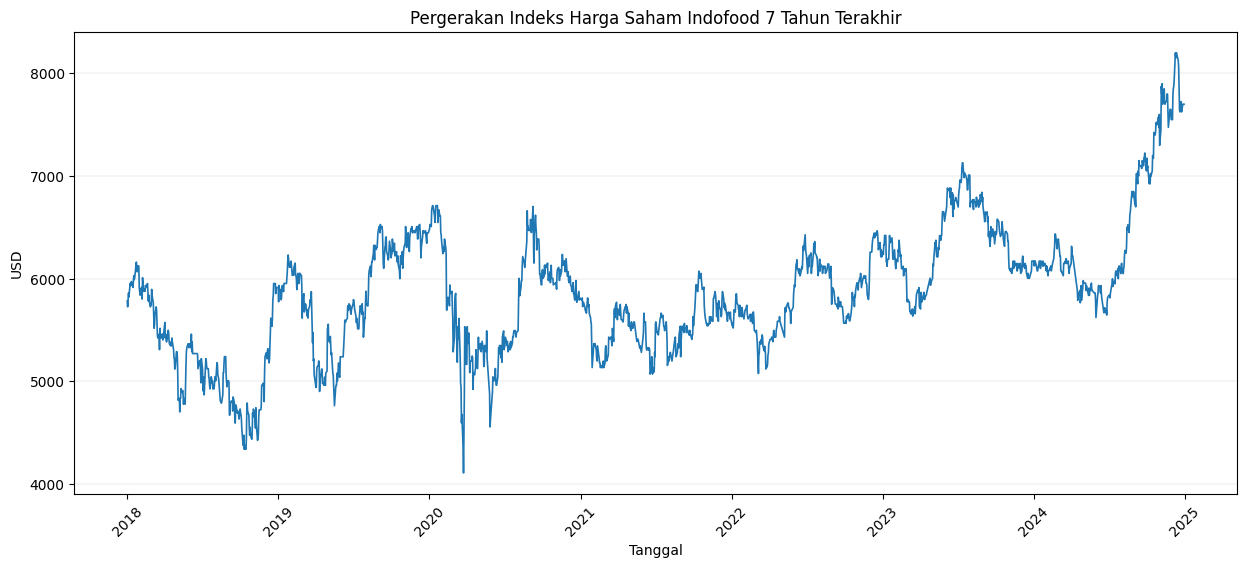

In [63]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham Indofood 7 Tahun Terakhir')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [64]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.40923477],
       [0.39533331],
       [0.4138689 ],
       ...,
       [0.85946743],
       [0.87779776],
       [0.87779776]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [65]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [66]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1730
Jumlah data training: 1384
Jumlah data validasi: 173
Jumlah data testing:173


In [67]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [68]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [69]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Bi - GRU

In [70]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, GRU, Bidirectional
from keras.models import Sequential

# Model Bi-GRU
model_bigru = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Sesuai dengan input data kamu
    Bidirectional(GRU(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(50, return_sequences=False)),
    Dropout(0.2),
    Dense(1)  # Output 1 nilai prediksi
])

# Ringkasan model
model_bigru.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 30, 100)        │        15,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,601 (240.63 KB)

 Trainable params: 61,601 (240.63 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_bigru_model.weights.h5'  # <- Ganti nama file
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [72]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bigru.compile(optimizer=op, loss='mean_squared_error')

In [73]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [74]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [75]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

In [76]:
# Melakukan training pada model GRU
history_bigru = model_bigru.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0975
Epoch 1: val_loss improved from inf to 0.03314, saving model to model_checkpoints/weights_bigru_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0962 - val_loss: 0.0331
Epoch 2/30
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135
Epoch 2: val_loss improved from 0.03314 to 0.00263, saving model to model_checkpoints/weights_bigru_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - val_loss: 0.0026
Epoch 3/30
17/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060
Epoch 3: val_loss improved from 0.00263 to 0.00186, saving model to model_checkpoints/weights_bigru_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053
Epoch 4: val_loss improved from 0.00186 to 0.00081, saving model to model_checkpoints/weights_bigru_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.

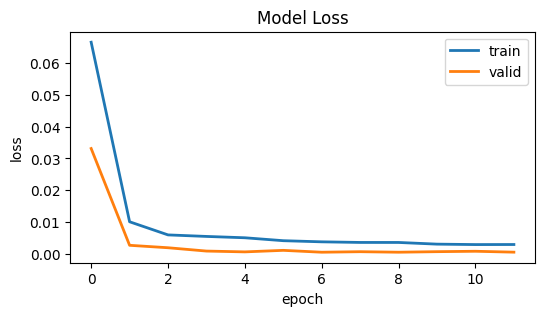

In [77]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bigru.history['loss'], linewidth=2)
plt.plot(history_bigru.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [37]:
# # Melakukan training pada model GRU
# history_bigru = model_bigru.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

In [78]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [79]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [80]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [81]:
# Load bobot model terbaik
model_bigru.load_weights("/content/model_checkpoints/weights_bigru_model.weights.h5")

In [82]:
# Melakukan prediksi
y_pred = model_bigru.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [83]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 67560.63
RMSE : 259.92
MAE  : 211.39
MAPE : 3.02 %


In [84]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1557,2024-04-17,5789.459473,6147.0
1558,2024-04-18,5861.229492,6080.0
1559,2024-04-19,5837.306152,6039.0
1560,2024-04-22,5885.153320,6005.0
1561,2024-04-23,5765.536133,5987.0
...,...,...,...
1725,2024-12-20,7625.000000,7675.0
1726,2024-12-23,7725.000000,7614.0
1727,2024-12-24,7625.000000,7588.0
1728,2024-12-27,7700.000000,7548.0


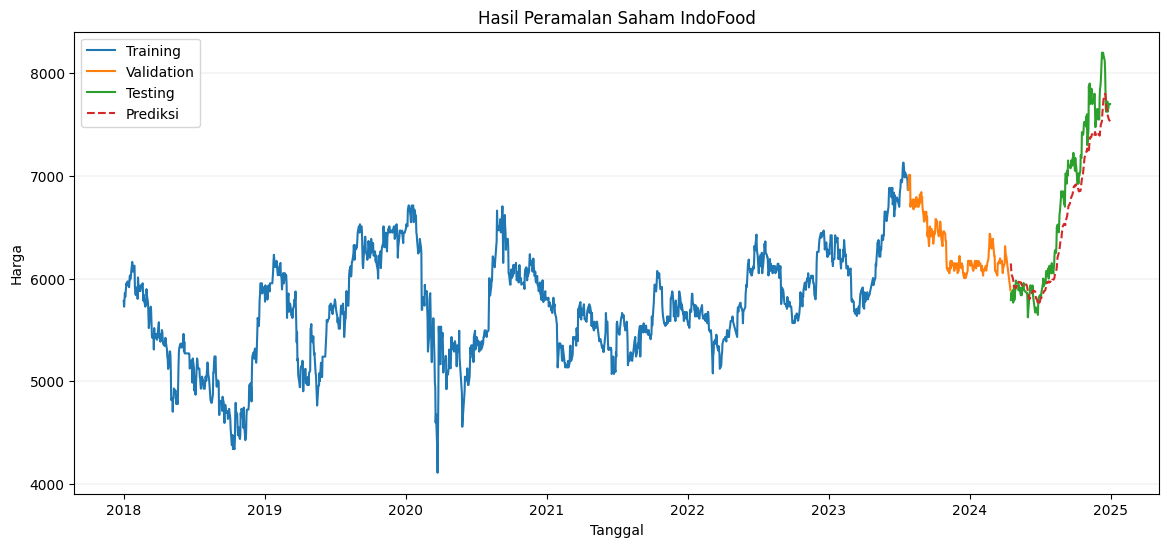

In [85]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham IndoFood')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

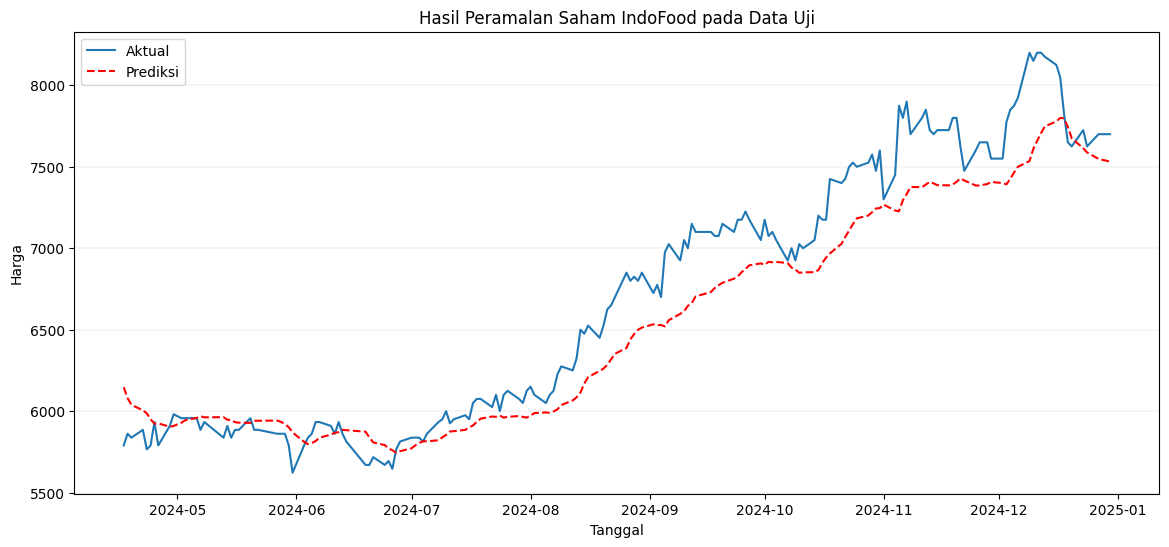

In [86]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham IndoFood pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# GRU =========

In [90]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, GRU
from keras.models import Sequential

# Model GRU biasa (non-bidirectional)
model_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Input shape: (timesteps, features)
    GRU(50, return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output 1 nilai prediksi
])

# Ringkasan model
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 30, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_gru_model.weights.h5'  # <- Ganti nama file
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [92]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_gru.compile(optimizer=op, loss='mean_squared_error')

In [96]:
# Melakukan training pada model GRU
history_gru = model_gru.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/50
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033
Epoch 1: val_loss did not improve from 0.00044
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033 - val_loss: 6.4218e-04
Epoch 2/50
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030
Epoch 2: val_loss did not improve from 0.00044
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030 - val_loss: 5.8132e-04
Epoch 3/50
36/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030
Epoch 3: val_loss did not improve from 0.00044
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - val_loss: 4.5020e-04
Epoch 4/50
36/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029
Epoch 4: val_loss did not improve from 0.00044
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - val_loss: 8.3601e-04
Epoch 5/50
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 5: val_loss did not improve from 0.00044
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 4.9919e-04
Epoch 6/50
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

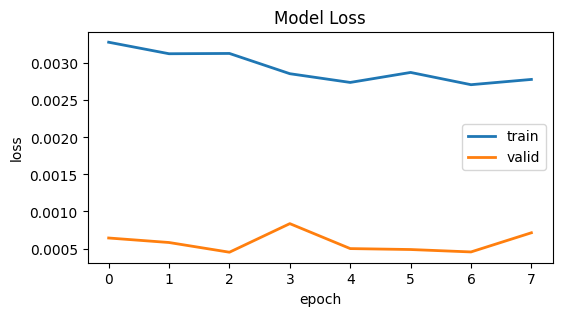

In [97]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_gru.history['loss'], linewidth=2)
plt.plot(history_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [98]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [99]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [100]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [101]:
# Load bobot model terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

In [102]:
# Melakukan prediksi
y_pred = model_gru.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [103]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 30045.8
RMSE : 85.33
MAE  : 133.35
MAPE : 1.92 %


In [104]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1557,2024-04-17,5789.459473,6153.679199
1558,2024-04-18,5861.229492,6081.155762
1559,2024-04-19,5837.306152,6020.020996
1560,2024-04-22,5885.153320,5969.867188
1561,2024-04-23,5765.536133,5939.125000
...,...,...,...
1725,2024-12-20,7625.000000,7822.062500
1726,2024-12-23,7725.000000,7741.156738
1727,2024-12-24,7625.000000,7686.514648
1728,2024-12-27,7700.000000,7636.451172


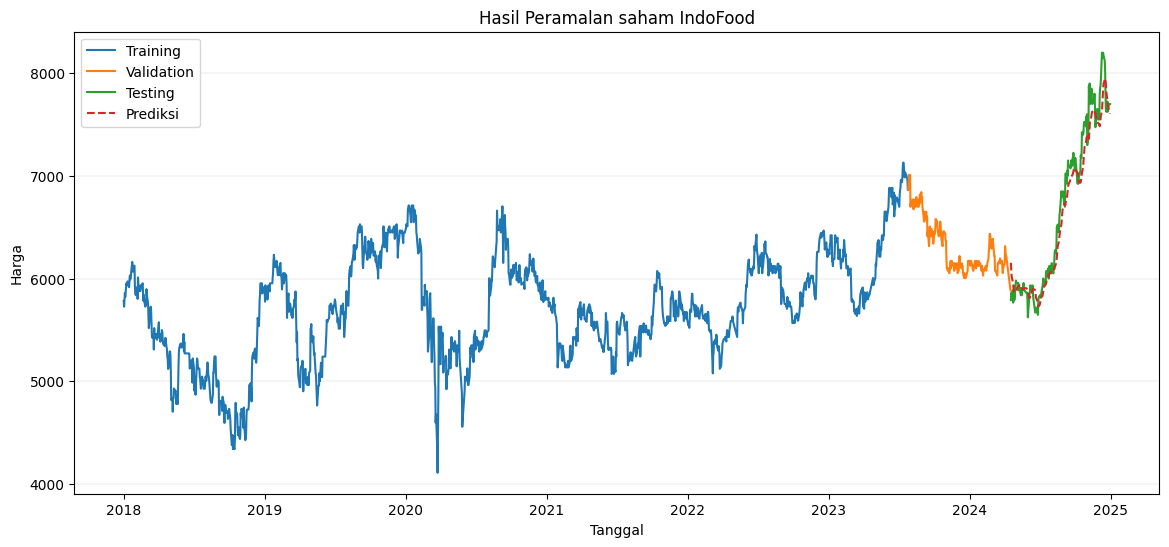

In [105]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan saham IndoFood')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

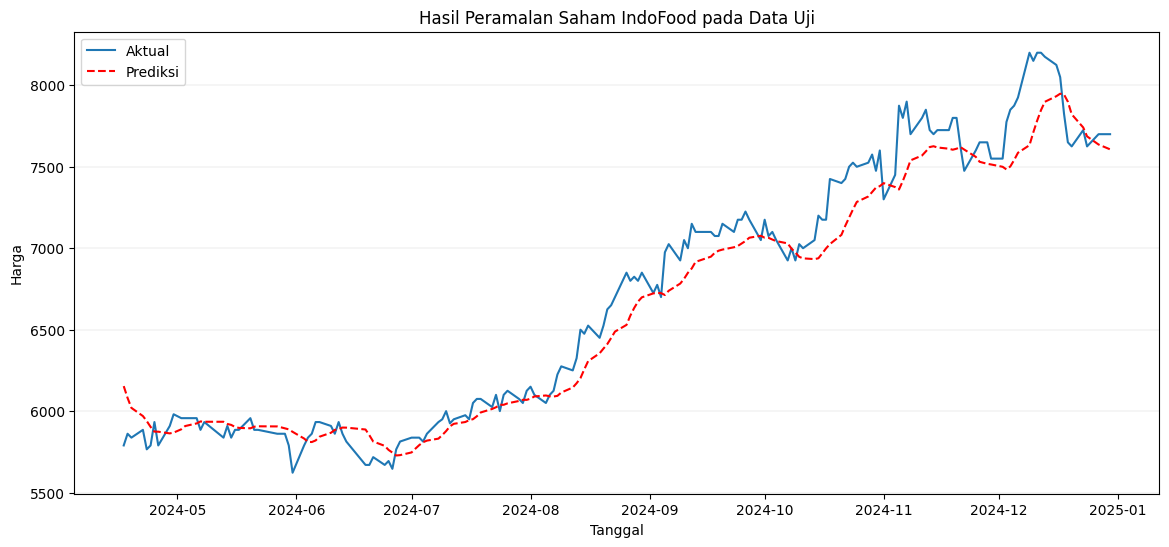

In [106]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham IndoFood pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# Stacked GRU ============

In [107]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Input, GRU
from keras.models import Sequential

# Model Stacked GRU
model_stacked_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # (timesteps, features)

    # GRU pertama (mengembalikan semua time step)
    GRU(64, return_sequences=True),
    Dropout(0.2),

    # GRU kedua (juga return_sequences=True agar bisa diteruskan ke GRU selanjutnya)
    GRU(64, return_sequences=True),
    Dropout(0.2),

    # GRU ketiga (hanya output terakhir yang dipakai)
    GRU(32, return_sequences=False),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

# Tampilkan struktur model
model_stacked_gru.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                     │ (None, 30, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 30, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,265 (184.63 KB)

 Trainable params: 47,265 (184.63 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_stacked_gru_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [110]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_stacked_gru.compile(optimizer=op, loss='mean_squared_error')

In [114]:
# Melakukan training pada model GRU
history_stacked_gru = model_stacked_gru.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/50
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046
Epoch 1: val_loss did not improve from 0.00056
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 2/50
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041
Epoch 2: val_loss did not improve from 0.00056
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - val_loss: 8.3705e-04
Epoch 3/50
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 3: val_loss improved from 0.00056 to 0.00056, saving model to model_checkpoints/weights_stacked_gru_model.weights.h5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - val_loss: 5.5557e-04
Epoch 4/50
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 4: val_loss did not improve from 0.00056
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 5/50
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
Epoch 5: val_loss improved from 0.00056 to 0.00054, saving model to model_checkpoints/weights_stacked_gru_mod

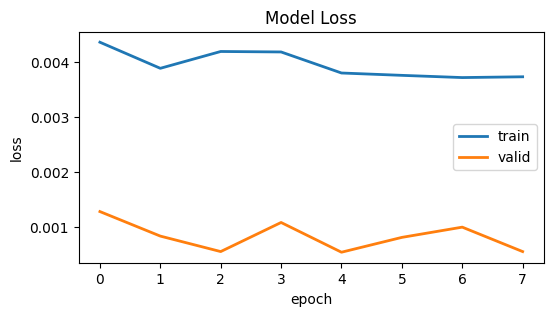

In [115]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_stacked_gru.history['loss'], linewidth=2)
plt.plot(history_stacked_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [116]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [117]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [118]:
# Ubah bentuk data menjadi bentuk yang diterima oleh GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [119]:
# Load bobot model terbaik
model_stacked_gru.load_weights("/content/model_checkpoints/weights_stacked_gru_model.weights.h5")

In [120]:
# Melakukan prediksi
y_pred = model_stacked_gru.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [121]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

MSE  : 37652.94
RMSE : 97.83
MAE  : 151.0
MAPE : 2.18 %


In [122]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1557,2024-04-17,5789.459473,6158.595215
1558,2024-04-18,5861.229492,6120.356934
1559,2024-04-19,5837.306152,6072.762207
1560,2024-04-22,5885.153320,6024.347656
1561,2024-04-23,5765.536133,5983.575195
...,...,...,...
1725,2024-12-20,7625.000000,7893.998535
1726,2024-12-23,7725.000000,7837.919434
1727,2024-12-24,7625.000000,7782.987305
1728,2024-12-27,7700.000000,7729.986328


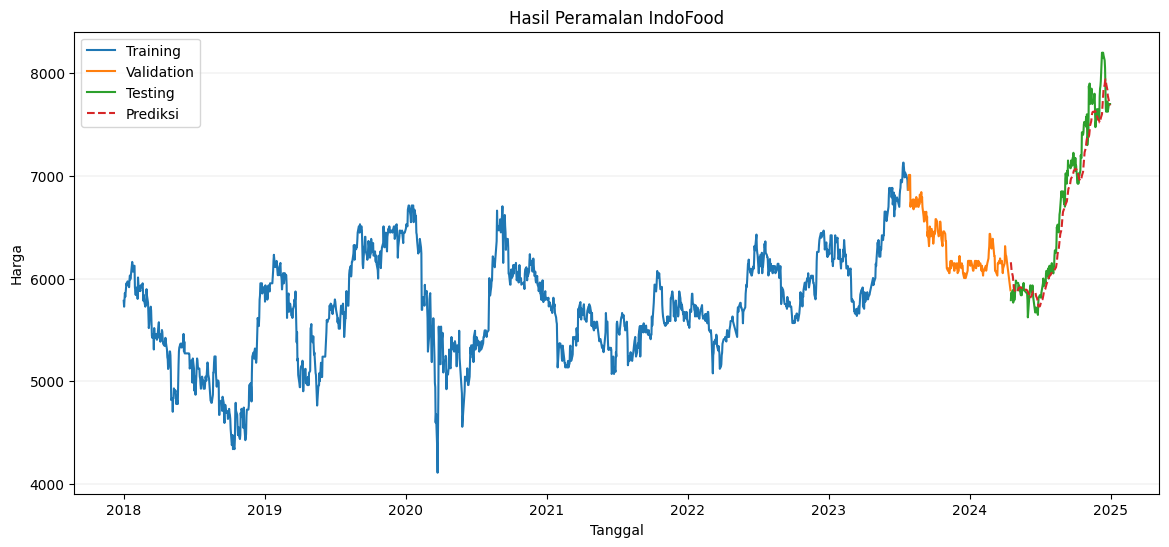

In [123]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan IndoFood')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

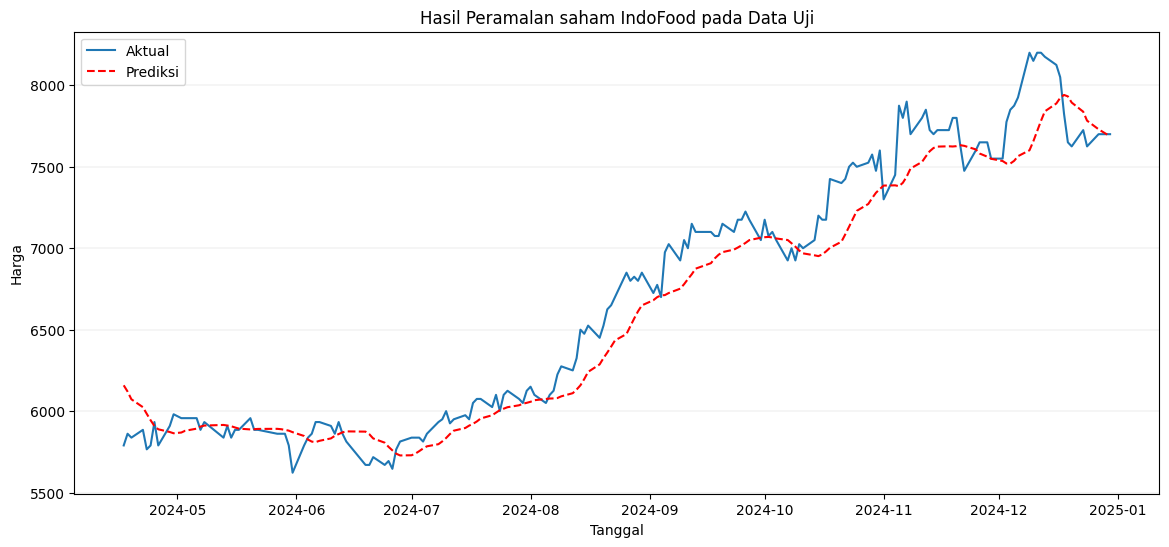

In [124]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan saham IndoFood pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# FORECAST

In [87]:
def forecast_next_30_days(model, last_data, scaler, days=30):
    forecast = []
    input_seq = last_data[-30:].reshape(1, 30, 1)  # ambil 30 data terakhir
    for _ in range(days):
        pred = model.predict(input_seq, verbose=0)
        forecast.append(pred[0,0])
        # Masalahnya ada pada [[pred]]. pred memiliki bentuk (1,1),
        # jadi [[pred]] memiliki bentuk (1,1,1,1).
        # Untuk memperbaikinya, kita ubah bentuk pred ke (1, 1, 1) sebelum ditambahkan:
        input_seq = np.append(input_seq[:,1:,:], pred.reshape(1, 1, 1), axis=1)
    forecast = np.array(forecast)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
    return forecast

In [125]:
# Gunakan model BiGRU
forecast_bigru = forecast_next_30_days(model_bigru, data_sc, sc)

# Gunakan model GRU
forecast_gru = forecast_next_30_days(model_gru, data_sc, sc)

#Gunakan model Stacked GRU
forecast_stacked_gru = forecast_next_30_days(model_stacked_gru, data_sc, sc)

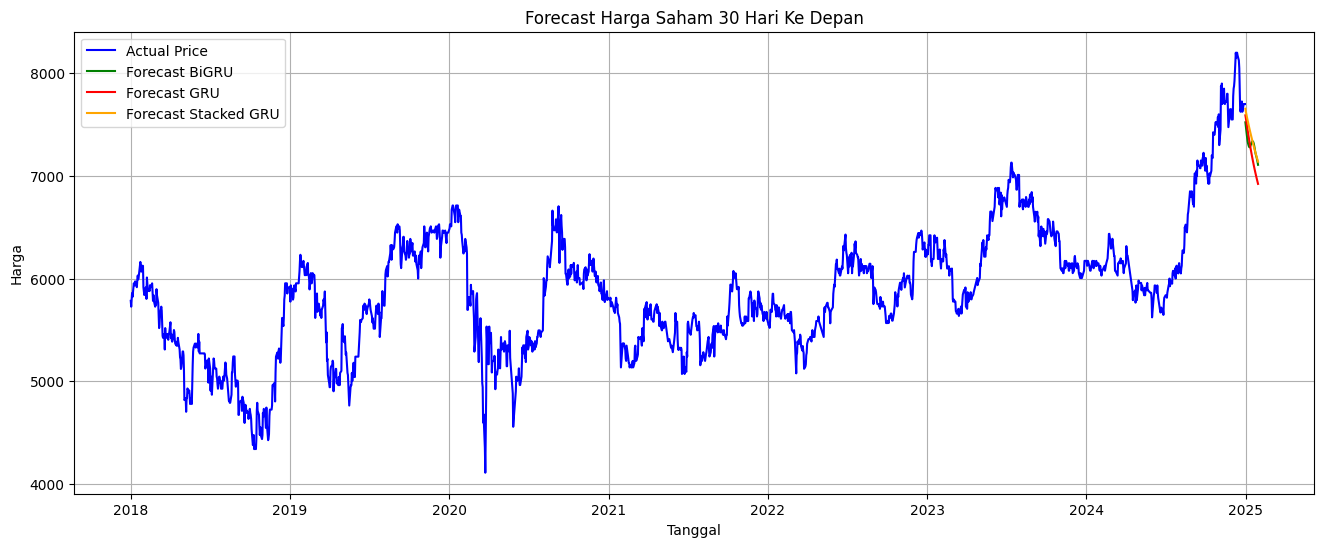

In [127]:
# Plot hasil forecasting
forecast_dates = pd.date_range(data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(16,6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.plot(forecast_dates, forecast_bigru, label='Forecast BiGRU', color='green')
plt.plot(forecast_dates, forecast_gru, label='Forecast GRU', color='red')
plt.plot(forecast_dates, forecast_stacked_gru, label='Forecast Stacked GRU', color='orange')
plt.title('Forecast Harga Saham 30 Hari Ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()
